# Ques 1a

In [134]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [135]:
mnist = datasets.load_digits()
type(mnist)

sklearn.utils.Bunch

In [121]:
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [122]:
data = pd.DataFrame(mnist.data)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [123]:
X = mnist.data
print(X.shape)

(1797, 64)


In [124]:
Y = mnist.target
print(Y.shape)

(1797,)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [126]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1617, 64)
(180, 64)
(1617,)
(180,)


# Ques 1b

/Users/shrutis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222


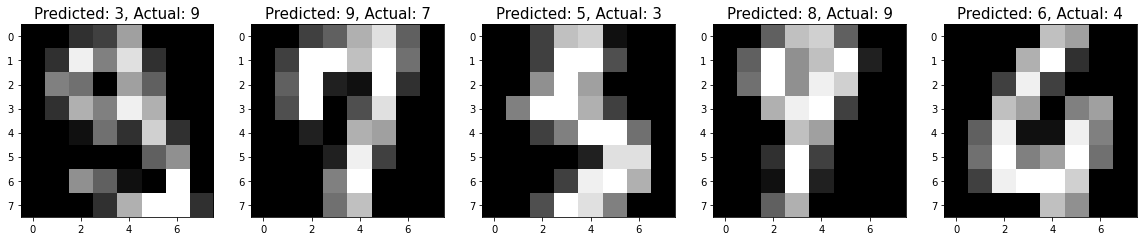

In [127]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

# Ques 2

(1000, 5)
(1000,)


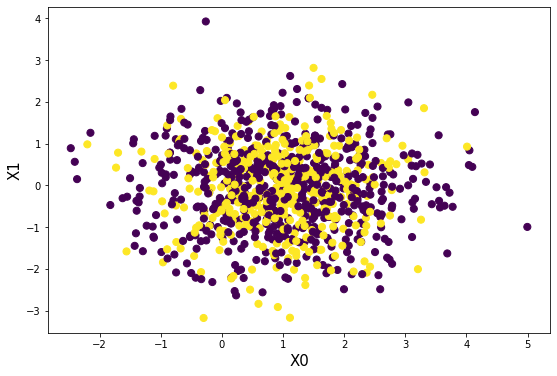

In [136]:
x, Y = datasets.make_classification(n_samples=1000, n_features=5, n_classes=2, n_redundant=0,
                                    n_clusters_per_class=1, weights=[0.5, 0.3], random_state=42)
fig, ax = plt.subplots(figsize=(9, 6))
print(x.shape)
print(Y.shape)
plt.xlabel("X0", fontsize=15)
plt.ylabel("X1", fontsize=15)
plt.scatter(x[:,0], x[:,1], s=50, c=Y)

In [128]:
labels = np.array([0,1]*500)
labels = labels.reshape(1000,1)
np.random.seed(42)
weights = np.random.rand(5,1)
bias = np.random.rand(1)
lr = 0.01


In [133]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [130]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

In [131]:
for epoch in range(8000):
    inputs = x

    # feedforward step1
    XW = np.dot(x, weights) + bias

    #feedforward step2
    z = sigmoid(XW)


    # backpropagation step 1
    error = z - labels

    print(error.sum())

    # backpropagation step 2
    dcost_dpred = error
    dpred_dz = sigmoid_der(z)

    z_delta = dcost_dpred * dpred_dz

    inputs = x.T
    weights -= lr * np.dot(inputs, z_delta)

    for num in z_delta:
        bias -= lr * num

75.78801260809362
11.18581631759057
10.887135476763383
5.1887317793988075
5.905248809633599
3.7773543672463816
3.5780370471787526
2.4128875076157117
2.065681093654659
1.4441618576562671
1.1751448586933941
0.843499134120755
0.6670127989816548
0.48733676731694064
0.3786585374428695
0.27972664913890277
0.21480879173512868
0.15962685576716495
0.1214843289547014
0.0904193468377823
0.06822292953821663
0.05062490560369337
0.03778273472725324
0.027772458685490164
0.020368868782599137
0.014659511266140512
0.010400794752520426
0.007138881915978779
0.004692593088796215
0.0028269333999952906
0.001422975924071146
0.00035516391338941133
-0.0004501373657914698
-0.0010615708534151835
-0.0015233240260856817
-0.0018735315803564134
-0.0021382380602581463
-0.0023388603044498524
-0.002490585581954363
-0.00260552834974348
-0.0026924869342979108
-0.002758345954667618
-0.0028081818618748144
-0.0028459189650282823
-0.0028744788645447272
-0.0028961027792195893
-0.002912469478347113
-0.002924860524643691
-0.0029